In [8]:
pwd

'/Users/maia/GEOS 4021'

In [2]:
# --- IMPORTING AND COMBINING OF FILES ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------------------------------------------
# 1. PIXL DATA (Mars)
# -------------------------------------------------------------

dfM = pd.read_csv('PIXLKizovski2025.csv')

# Drop zeros for P2O5
dfM = dfM[dfM['P2O5 (wt%)'] != 0]

# Standardize column names
dfM = dfM.rename(columns={
    'P2O5 (wt%)': 'P2O5',
    'Map': 'Sol'
})

# Add source column
dfM['Source'] = 'Mars'

dfM.to_csv('PIXLKizovski2025Filtered.csv', index=False)

# -------------------------------------------------------------
# 2. ISUA (Greenland)
# -------------------------------------------------------------

dfEG = pd.read_csv('ISUA.csv', encoding='latin1')

# Coerce columns to numeric
dfEG['P2O5(WT%)'] = pd.to_numeric(dfEG['P2O5(WT%)'], errors='coerce')
dfEG['AGE (MIN.)'] = pd.to_numeric(dfEG['AGE (MIN.)'], errors='coerce')
dfEG['AGE (MAX.)'] = pd.to_numeric(dfEG['AGE (MAX.)'], errors='coerce')

dfEG = dfEG.dropna(subset=['P2O5(WT%)', 'AGE (MIN.)', 'AGE (MAX.)'])

dfEG['Age_Median'] = (dfEG['AGE (MIN.)'] + dfEG['AGE (MAX.)']) / 2

# Standardize column names
dfEG = dfEG.rename(columns={'P2O5(WT%)': 'P2O5'})
dfEG['Source'] = 'Isua'

dfEG.to_csv('ISUAFiltered.csv', index=False)

# -------------------------------------------------------------
# 3. KAAPVAAL
# -------------------------------------------------------------

dfEK = pd.read_csv('KAAPVAAL.csv', encoding='latin1')

dfEK['P2O5(WT%)'] = pd.to_numeric(dfEK['P2O5(WT%)'], errors='coerce')
dfEK['AGE (MIN.)'] = pd.to_numeric(dfEK['AGE (MIN.)'], errors='coerce')
dfEK['AGE (MAX.)'] = pd.to_numeric(dfEK['AGE (MAX.)'], errors='coerce')

dfEK = dfEK.dropna(subset=['P2O5(WT%)', 'AGE (MIN.)', 'AGE (MAX.)'])

dfEK['Age_Median'] = (dfEK['AGE (MIN.)'] + dfEK['AGE (MAX.)']) / 2
dfEK = dfEK.rename(columns={'P2O5(WT%)': 'P2O5'})
dfEK['Source'] = 'Kaapvaal'

dfEK.to_csv('KAAPVAALFiltered.csv', index=False)

# -------------------------------------------------------------
# 4. PILBARA
# -------------------------------------------------------------

dfEP = pd.read_csv('PILBARA.csv', encoding='latin1')

dfEP['P2O5(WT%)'] = pd.to_numeric(dfEP['P2O5(WT%)'], errors='coerce')
dfEP['AGE (MIN.)'] = pd.to_numeric(dfEP['AGE (MIN.)'], errors='coerce')
dfEP['AGE (MAX.)'] = pd.to_numeric(dfEP['AGE (MAX.)'], errors='coerce')

dfEP = dfEP.dropna(subset=['P2O5(WT%)', 'AGE (MIN.)', 'AGE (MAX.)'])

dfEP['Age_Median'] = (dfEP['AGE (MIN.)'] + dfEP['AGE (MAX.)']) / 2
dfEP = dfEP.rename(columns={'P2O5(WT%)': 'P2O5'})
dfEP['Source'] = 'Pilbara'

dfEP.to_csv('PILBARAFiltered.csv', index=False)

# -------------------------------------------------------------
# Check cleaned outputs
print(dfM.head())
print(dfEG.head())
print(dfEK.head())
print(dfEP.head())

       Sol   PMC  SiO2 (wt%)  SiO2 (err, wt%)  Na2O (wt%)  Na2O (err, wt%)  \
0  Sol 789   4.0   45.786915         1.659371    0.929000         0.863161   
1  Sol 789   5.0   39.782466         1.441873    0.382034         0.820493   
2  Sol 789   6.0   35.438353         1.288484    0.000000         0.000000   
5  Sol 789   9.0   51.797405         1.906015    0.992120         1.095302   
6  Sol 789  10.0   70.438028         2.532326    0.421706         0.622038   

   Al2O3 (wt%)  Al2O3 (err, wt%)  FeO (wt%)  FeO (err, wt%)  ...  \
0     0.348356          0.193012  23.938500        0.852263  ...   
1     0.567128          0.194422  25.403453        0.901965  ...   
2     0.544288          0.181836  26.910144        0.956161  ...   
5     0.970956          0.258191  14.015453        0.704832  ...   
6     0.134442          0.127774   3.769700        0.509000  ...   

   Cl (err, wt%)  K2O (wt%)  K2O (err, wt%)  MnO (wt%)  MnO (err, wt%)  \
0       0.182701        0.0             0.0   0.

In [3]:
import pandas as pd
df = pd.read_csv("P2O5ISUAFiltered.csv")
print(df.columns)


Index(['AGE (MIN.)', 'AGE (MAX.)', 'P2O5 (wt%) Isua', 'Isua Median Age'], dtype='object')


In [4]:
import pandas as pd

mars = pd.read_csv("PIXLKizovski2025.csv")
print(mars.columns.tolist())

['Map', 'PMC', 'SiO2 (wt%)', 'SiO2 (err, wt%)', 'Na2O (wt%)', 'Na2O (err, wt%)', 'Al2O3 (wt%)', 'Al2O3 (err, wt%)', 'FeO (wt%)', 'FeO (err, wt%)', 'MgO (wt%)', 'MgO (err, wt%)', 'CaO (wt%)', 'CaO (err, wt%)', 'P2O5 (wt%)', 'P2O5 (err, wt%)', 'SO3 (wt%)', 'SO3 (err, wt%)', 'Cl (wt%)', 'Cl (err, wt%)', 'K2O (wt%)', 'K2O (err, wt%)', 'MnO (wt%)', 'MnO (err, wt%)', 'Cr2O3 (wt%)', 'Cr2O3 (err, wt%)', 'TiO2 (wt%)', 'TiO2 (err, wt%)']


/Users/maia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



===== T TEST RESULTS =====
Earth vs Mars (PIXL):
Ttest_indResult(statistic=-19.996719983163295, pvalue=3.595203291005697e-83)

Isua vs Mars (PIXL):
Ttest_indResult(statistic=-14.889672345534041, pvalue=1.7506633737657661e-25)


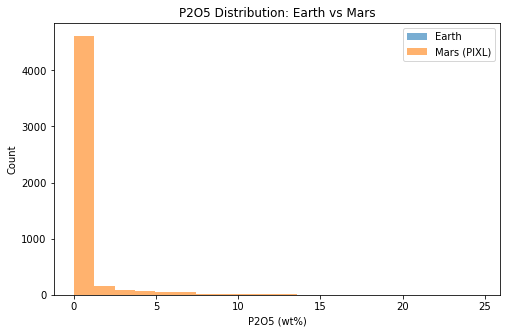

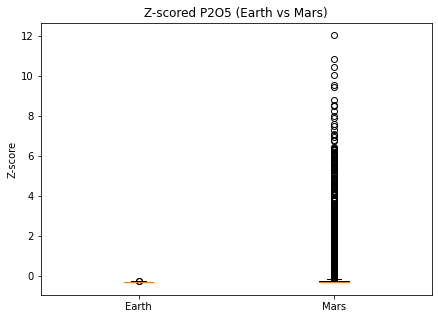

/Users/maia/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


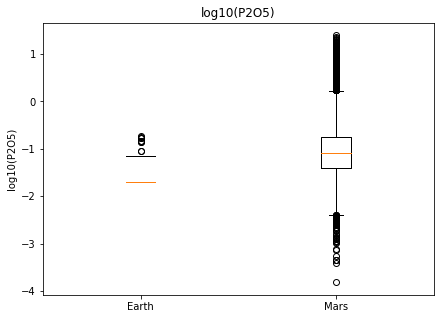

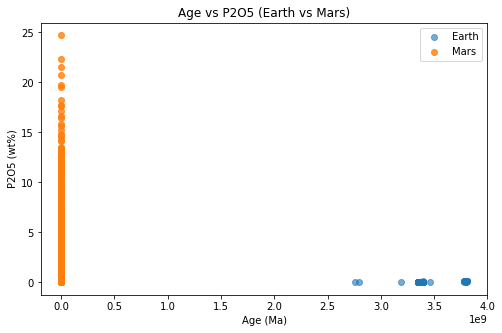


Pipeline complete.


In [5]:
# ======================================================
# CLEAN, NORMALIZE, AND COMPARE EARTH vs MARS (OPTION B)
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ------------------------------------------------------
# 1. LOAD ALL DATASETS (your local files)
# ------------------------------------------------------

pixl     = pd.read_csv('PIXLKizovski2025Filtered.csv')
isua     = pd.read_csv('ISUAFiltered.csv')
kaapvaal = pd.read_csv('KAAPVAALFiltered.csv')
pilbara  = pd.read_csv('PILBARAFiltered.csv')

# ------------------------------------------------------
# 2. CLEAN EARTH AGES
# ------------------------------------------------------

earth_dfs = [isua, kaapvaal, pilbara]

for df in earth_dfs:
    df["AGE (MIN.)"] = pd.to_numeric(df["AGE (MIN.)"], errors="coerce")
    df["AGE (MAX.)"] = pd.to_numeric(df["AGE (MAX.)"], errors="coerce")

    # Drop missing ages
    df.dropna(subset=["AGE (MIN.)", "AGE (MAX.)"], inplace=True)

    # Median age
    df["AGE_MEDIAN"] = (df["AGE (MIN.)"] + df["AGE (MAX.)"]) / 2

# ------------------------------------------------------
# 3. ASSIGN PIXL A GEOLOGIC AGE BUT KEEP SOL
# ------------------------------------------------------

PIXL_AGE_GA = 3.7
PIXL_AGE_MA = 1000 * PIXL_AGE_GA

pixl["AGE (MIN.)"] = PIXL_AGE_MA
pixl["AGE (MAX.)"] = PIXL_AGE_MA
pixl["AGE_MEDIAN"] = PIXL_AGE_MA

# Retain SOL as-is
# ------------------------------------------------------

# ------------------------------------------------------
# 4. ASSIGN SOURCE LABELS
# ------------------------------------------------------

pixl["SOURCE"] = "PIXL"
isua["SOURCE"] = "ISUA"
kaapvaal["SOURCE"] = "KAAPVAAL"
pilbara["SOURCE"] = "PILBARA"

# ------------------------------------------------------
# 5. COMBINE INTO ONE DATASET FOR NORMALIZATION & STATS
# ------------------------------------------------------

combined = pd.concat([pixl, isua, kaapvaal, pilbara], ignore_index=True)

# Make sure P2O5 is numeric
combined["P2O5"] = pd.to_numeric(combined["P2O5"], errors="coerce")
combined = combined.dropna(subset=["P2O5"])

# ------------------------------------------------------
# 6. NORMALIZATION FUNCTION
# ------------------------------------------------------

def normalize(df):
    df = df.copy()
    
    df["P2O5_z"] = (df["P2O5"] - df["P2O5"].mean()) / df["P2O5"].std()
    df["P2O5_minmax"] = (df["P2O5"] - df["P2O5"].min()) / (df["P2O5"].max() - df["P2O5"].min())
    df["P2O5_log"] = np.log10(df["P2O5"])
    
    return df

combined_norm = normalize(combined)

# Also create separate subsets for T-tests
pixl_norm     = combined_norm[combined_norm["SOURCE"] == "PIXL"]
earth_norm    = combined_norm[combined_norm["SOURCE"] != "PIXL"]
isua_norm     = combined_norm[combined_norm["SOURCE"] == "ISUA"]

# ------------------------------------------------------
# 7. T-TESTS
# ------------------------------------------------------

t_EarthMars = stats.ttest_ind(
    earth_norm["P2O5"].dropna(),
    pixl_norm["P2O5"].dropna(),
    equal_var=False
)

t_IsuaMars = stats.ttest_ind(
    isua_norm["P2O5"].dropna(),
    pixl_norm["P2O5"].dropna(),
    equal_var=False
)

print("\n===== T TEST RESULTS =====")
print("Earth vs Mars (PIXL):")
print(t_EarthMars)

print("\nIsua vs Mars (PIXL):")
print(t_IsuaMars)

# ------------------------------------------------------
# 8. PLOTTING SECTION
# ------------------------------------------------------

# RAW HISTOGRAM
plt.figure(figsize=(8,5))
plt.hist(earth_norm["P2O5"], bins=20, alpha=0.6, label="Earth")
plt.hist(pixl_norm["P2O5"], bins=20, alpha=0.6, label="Mars (PIXL)")
plt.xlabel("P2O5 (wt%)")
plt.ylabel("Count")
plt.title("P2O5 Distribution: Earth vs Mars")
plt.legend()
plt.show()

# Z-SCORE BOXPLOT
plt.figure(figsize=(7,5))
plt.boxplot([earth_norm["P2O5_z"], pixl_norm["P2O5_z"]], labels=["Earth", "Mars"])
plt.title("Z-scored P2O5 (Earth vs Mars)")
plt.ylabel("Z-score")
plt.show()

# LOG10 BOXPLOT
plt.figure(figsize=(7,5))
plt.boxplot([earth_norm["P2O5_log"], pixl_norm["P2O5_log"]], labels=["Earth", "Mars"])
plt.title("log10(P2O5)")
plt.ylabel("log10(P2O5)")
plt.show()

# AGE vs P2O5
plt.figure(figsize=(8,5))
plt.scatter(earth_norm["AGE_MEDIAN"], earth_norm["P2O5"], alpha=0.6, label="Earth")
plt.scatter(pixl_norm["AGE_MEDIAN"], pixl_norm["P2O5"], alpha=0.8, label="Mars")
plt.xlabel("Age (Ma)")
plt.ylabel("P2O5 (wt%)")
plt.title("Age vs P2O5 (Earth vs Mars)")
plt.legend()
plt.show()

print("\nPipeline complete.")



KeyError: 'P2O5(WT%)'

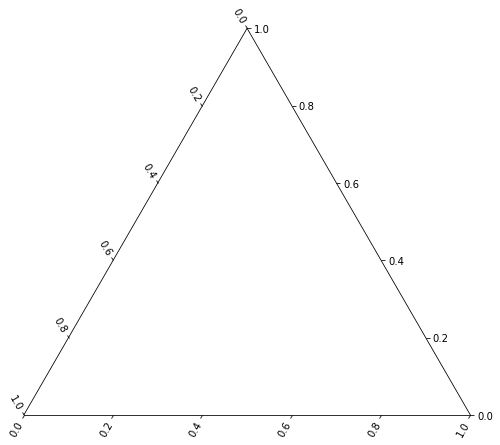

In [6]:
import matplotlib.pyplot as plt
import mpltern
import pandas as pd

pixl     = pd.read_csv('PIXLKizovski2025Filtered.csv')
isua     = pd.read_csv('ISUAFiltered.csv')
kaapvaal = pd.read_csv('KAAPVAALFiltered.csv')
pilbara  = pd.read_csv('PILBARAFiltered.csv')

datasets = {
    "PIXL": pixl,
    "Isua": isua,
    "Kaapvaal": kaapvaal,
    "Pilbara": pilbara
}


colors = {
    "isua": "blue",
    "pilbara": "red",
    "kaapvaal": "green",
    "mars (PIXL)": "orange"
}

plt.figure(figsize=(8, 8))
ax = plt.subplot(projection='ternary')

for name, df in datasets.items():
    ax.scatter(
        df["P2O5(WT%)"],
        df["FE2O3(WT%)"],
        df["SIO2(WT%)"],
        s=20,
        alpha=0.7,
        color=colors[name],
        label=name
    )

ax.set_tlabel("P2O5(WT%)")
ax.set_llabel("FE2O3(WT%)")
ax.set_rlabel("SIO2(WT%)")

ax.set_title("Ternary Diagram: P2O5(WT%) – FE2O3(WT%) – SIO2(WT%)")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
isua = pd.read_csv("P2O5ISUAFiltered.csv")
pilbara = pd.read_csv("P2O5PILBARAFiltered.csv")
kaapvaal = pd.read_csv("P2O5KAAPVAALFiltered.csv")

# Rename columns for consistent plotting
isua = isua.rename(columns={'P2O5 (wt%) Isua': 'P2O5'})
pilbara = pilbara.rename(columns={'P2O5 (wt%) Pilbara': 'P2O5'})
kaapvaal = kaapvaal.rename(columns={'P2O5 (wt%) Kaapvaal': 'P2O5'})

# Earth plot
plt.figure(figsize=(9,6))

plt.scatter(isua['Isua Median Age'], isua['P2O5'], label='Isua', alpha=0.7)
plt.scatter(pilbara['Pilbara Median Age'], pilbara['P2O5'], label='Pilbara', alpha=0.7)
plt.scatter(kaapvaal['Kaapvaal Median Age'], kaapvaal['P2O5'], label='Kaapvaal', alpha=0.7)

plt.xlabel("Age (Ga)")
plt.ylabel("P₂O₅ (wt%)")
plt.title("Earth Cratons: P₂O₅ vs Age")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
####/Users/maia/Desktop/GEOL4021/Project

import pandas as pd
import matplotlib.pyplot as plt

isua = pd.read_csv("/Users/maia/Desktop/GEOL4021/Project/P2O5ISUAFiltered.csv")
mars = pd.read_csv("/Users/maia/Desktop/GEOL4021/Project/PIXLKizovski2025.csv")

# Clean column names
isua = isua.rename(columns={'P2O5 (wt%) Isua': 'P2O5'})

# Mars: rename and attach approximate age
mars = mars.rename(columns={'P2O5 (wt%)': 'P2O5'})
mars['Age_Ga'] = 3.7  # Assign fixed age

plt.figure(figsize=(9,6))

plt.scatter(isua['Isua Median Age'], isua['P2O5'], alpha=0.7, label="Isua (Earth)")
plt.scatter(mars['Age_Ga'], mars['P2O5'], alpha=0.7, label="Mars")

plt.xlabel("Age (Ga)")
plt.ylabel("P₂O₅ (wt%)")
plt.title("Isua vs Mars: P₂O₅ vs Age")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Extract sol from Map
mars["Sol"] = mars["Map"].astype(str).str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(9,6))

plt.scatter(mars["Sol"], mars["P2O5 (wt%)"], 
            alpha=0.8, color="firebrick")

plt.xlabel("Sol (Mars days since landing)")
plt.ylabel("P₂O₅ (wt%)")
plt.title("Mars PIXL: P₂O₅ vs Sol")
plt.show()



In [7]:
pwd

'/Users/maia/GEOS 4021'